In [11]:
import sympy as sp
import numpy as np
from sympy.physics.vector import dynamicsymbols
from sympy.physics.vector import time_derivative
from sympy.physics.vector import ReferenceFrame
N = ReferenceFrame('N')
import pylab as pl
import control
from sympy.physics.mechanics import *
from numpy.linalg import matrix_rank, eig
import WIP_utils as utils
import modern_robotics as mr
import matplotlib.pyplot as plt



In [12]:
RAD2DEG = 180/np.pi




def theta_print():
    print(theta[0])

def theta_q():
    global theta
    theta = [1,2,3,4]

In [13]:
theta_q()


In [14]:
theta_print()

1


In [153]:
time, traj = utils.Trapezoidal_Traj_Gen_Given_Amax_and_T(1,2.5,0.01)

In [144]:
max(traj[:,2])

0.4

In [175]:
traj_th1 = utils.Path_Gen(0, 0.14, traj[:,0])
traj_th1.shape

(252,)

In [176]:
traj_th1[-1]

0.14

In [170]:
traj_ddth4 = utils.Path_Gen(0, -1.1314, traj[:,2])
traj_ddth4.shape

(252,)

In [171]:
time.shape

(252, 1)

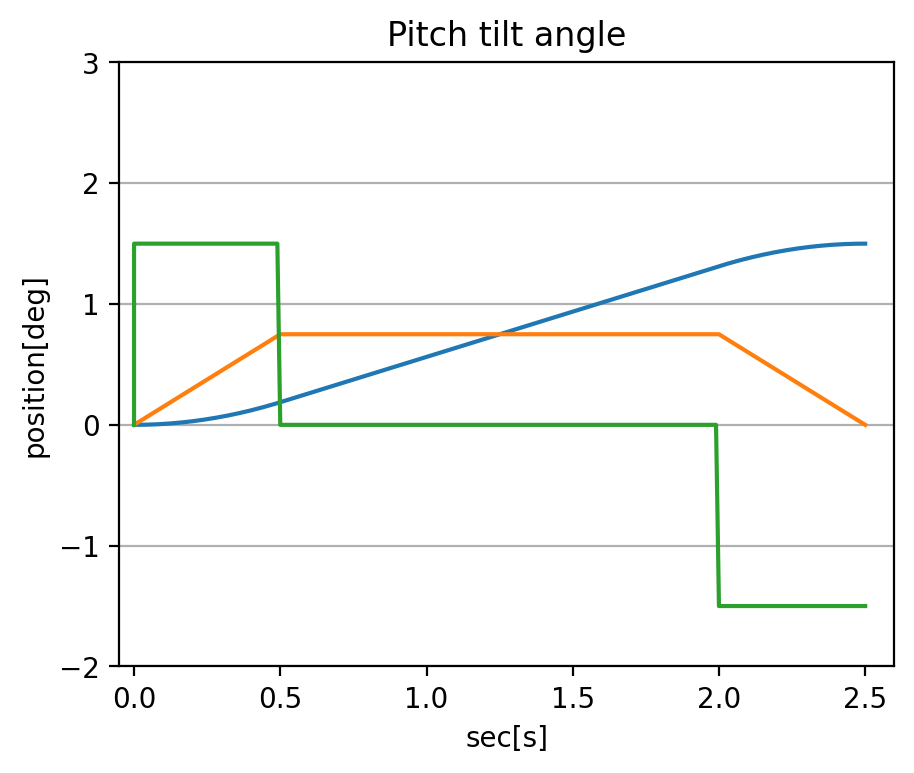

In [155]:
plt.figure(1, figsize=(5,4), dpi=200)
plt.plot(time, traj*1.5)

plt.xlabel('sec[s]')
plt.ylabel('position[deg]')
plt.title('Pitch tilt angle')
plt.ylim(-2,3)
plt.xlim(-0.05, 2.6)
# plt.legend(loc='upper right')
plt.grid(True, axis='y')

plt.show()

In [167]:
h = 0.8

m2 = 1.416
m3 = 1.739
m4 = 3.25+12.5

L1 = 0.171
L2 = 0.28
L3 = 0.28
L4 = 0.346

L2c = L2 *0.75
L3c = L3 / 2

theta_3, q2 = sp.symbols('theta_3, q2')

A = (h-L1-L4)/L2
B = m2*L2c + m3*L2+m4*L2
C = m3*L3c + m4*L3

f1 = sp.Eq(sp.cos(q2)+sp.sin(theta_3),float(A))
f2 = sp.Eq(-float(B)*sp.sin(q2)+float(C)*sp.cos(theta_3),0)
sol = sp.solve([f1,f2])
solu = sol[0]

q2 = solu[q2]
theta_3 = solu[theta_3]
q1 = np.pi/2
q3 = theta_3-q1-q2
q4 = -(q2+q3)

thetalistd = np.array([q1, q2, q3,q4])
thetalistd

array([1.5707963267948966, -0.945497664433305, 2.07691797181133,
       -1.13142030737802], dtype=object)

In [160]:
def get_torque_traj():
    traj_th1 = utils.Path_Gen(0, 0, traj[:,0])
    traj_th2 = utils.Path_Gen(0, -0.9455, traj[:,0])
    traj_th3 = utils.Path_Gen(0, 2.0769, traj[:,0])
    traj_th4 = utils.Path_Gen(0, -1.1314, traj[:,0])

    traj_dth1 = utils.Path_Gen(0, 0, traj[:,1])
    traj_dth2 = utils.Path_Gen(0, -0.9455, traj[:,1])
    traj_dth3 = utils.Path_Gen(0, 2.0769, traj[:,1])
    traj_dth4 = utils.Path_Gen(0, -1.1314, traj[:,1])

    traj_ddth1 = utils.Path_Gen(0, 0, traj[:,2])
    traj_ddth2 = utils.Path_Gen(0, -0.9455, traj[:,2])
    traj_ddth3 = utils.Path_Gen(0, 2.0769, traj[:,2])
    traj_ddth4 = utils.Path_Gen(0, -1.1314, traj[:,2])

    eint = np.array([0.2, 0.2, 0.2])
    g = np.array([0, 0, -9.8])
    M01 = np.array([[1, 0, 0,        0],
                    [0, 1, 0,        0],
                    [0, 0, 1, 0.089159],
                    [0, 0, 0,        1]])
    M12 = np.array([[ 0, 0, 1,    0.28],
                    [ 0, 1, 0, 0.13585],
                    [-1, 0, 0,       0],
                    [ 0, 0, 0,       1]])
    M23 = np.array([[1, 0, 0,       0],
                    [0, 1, 0, -0.1197],
                    [0, 0, 1,   0.395],
                    [0, 0, 0,       1]])
    M34 = np.array([[1, 0, 0,       0],
                    [0, 1, 0,       0],
                    [0, 0, 1, 0.14225],
                    [0, 0, 0,       1]])
    G1 = np.diag([0.010267, 0.010267, 0.00666, 3.7, 3.7, 3.7])
    G2 = np.diag([0.22689, 0.22689, 0.0151074, 8.393, 8.393, 8.393])
    G3 = np.diag([0.0494433, 0.0494433, 0.004095, 2.275, 2.275, 2.275])
    Glist = np.array([G1, G2, G3])
    Mlist = np.array([M01, M12, M23, M34])
    Slist = np.array([[1, 0, 1,      0, 1,     0],
                        [0, 1, 0, -0.089, 0,     0],
                        [0, 1, 0, -0.089, 0, 0.425]]).T
    Kp = 1.3
    Ki = 1.2
    Kd = 1.1

    for i in range(0, time-1):
        thetalist = np.array([traj_th1[i], traj_th2[i], traj_th3[i], traj_th4[i]])
        dthetalist = np.array([traj_dth1[i], traj_dth2[i], traj_dth3[i], traj_dth4[i]])

        thetalistd = np.array([traj_th1[i+1], traj_th2[i+1], traj_th3[i+1], traj_th4[i+1]])
        dthetalistd = np.array([traj_dth1[i+1], traj_dth2[i+1], traj_dth3[i+1], traj_dth4[i+1]])
        ddthetalistd = np.array([traj_ddth1[i+1], traj_ddth2[i+1], traj_ddth3[i+1], traj_ddth4[i+1]])

        mr.ComputedTorque(thetalist, dthetalist, eint, g, Mlist, Glist, Slist, \
                   thetalistd, dthetalistd, ddthetalistd, Kp, Ki, Kd)






In [166]:
t = 
t

array([133.00525246, -29.94223324,  -3.03276856])